In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

PREPROCESSING DATA

In [60]:
training_data,validation_data = tf.keras.utils.image_dataset_from_directory(
    'PlantVillage',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=27,
    validation_split= 0.2,
    subset='both',
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
   
)

Found 20638 files belonging to 15 classes.
Using 16511 files for training.
Using 4127 files for validation.


In [ ]:
for x,y in training_data:
    print(x, x.shape)
    print(y, y.shape)
    break

## Building Model

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(filters=32,kernel_size=3, padding='same', activation='relu', input_shape=(128,128,3) ))
model.add(Conv2D(filters=32,kernel_size=3, activation='relu',  ))
model.add(MaxPool2D(pool_size=2, strides=2))

In [44]:
model.add(Conv2D(filters=64,kernel_size=3, padding='same', activation='relu' ))
model.add(Conv2D(filters=64,kernel_size=3, activation='relu',  ))
model.add(MaxPool2D(pool_size=2, strides=2))

In [45]:
model.add(Conv2D(filters=128,kernel_size=3, padding='same', activation='relu' ))
model.add(Conv2D(filters=128,kernel_size=3, activation='relu',  ))
model.add(MaxPool2D(pool_size=2, strides=2))

In [46]:
model.add(Conv2D(filters=256,kernel_size=3, padding='same', activation='relu',  ))
model.add(Conv2D(filters=256,kernel_size=3, activation='relu',  ))
model.add(MaxPool2D(pool_size=2, strides=2))

In [47]:
model.add(Conv2D(filters=512,kernel_size=3, padding='same', activation='relu' ))
model.add(Conv2D(filters=512,kernel_size=3, activation='relu',  ))
model.add(MaxPool2D(pool_size=2, strides=2))

In [48]:
model.add(Dropout(0.25))

In [49]:
model.add(Flatten())

In [50]:
model.add(Dense(units=1500, activation ='relu'))

In [51]:
model.add(Dropout(0.4))

In [52]:
model.add(Dense(units=15, activation='softmax',))

Compile the model

In [53]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [8]:
# training_history = model.fit(x=training_data, validation_data=validation_data, epochs=10)

MODEL EVALUATION

In [57]:
## Saving Model

model.save("trained_model.keras")

In [58]:
##Recording History

import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [20]:
import json

with open('training_hist.json','r') as file:
    training_history = json.load(file)

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('trained_model.keras')

# Check the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

In [14]:
#Model Evaluation on training set

train_loss, train_acc = model.evaluate(training_data)

516/516 [==============================] - 494s 952ms/step - loss: 0.0756 - accuracy: 0.9785


In [15]:
#Model Evaluation on training set

val_loss, val_acc = model.evaluate(validation_data)

129/129 [==============================] - 115s 877ms/step - loss: 0.2694 - accuracy: 0.9200


ACCURACY VISUALIZATION

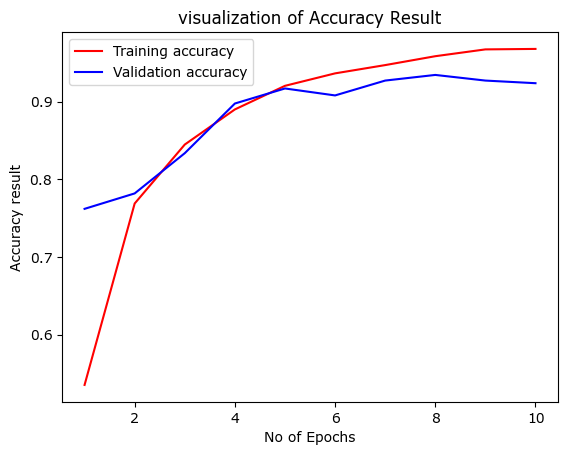

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history['accuracy'], color='red', label='Training accuracy')
plt.plot(epochs, training_history['val_accuracy'], color='blue', label='Validation accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy result')
plt.title('visualization of Accuracy Result')
plt.legend()
plt.show()

METRICS FOR MODEL EVALUATION

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [61]:
test_set = validation_data

In [62]:
y_pred = model.predict(test_set)

129/129 [==============================] - 118s 901ms/step


In [63]:
y_pred, y_pred.shape

(array([[1.61067277e-07, 8.35242364e-09, 1.37577810e-10, ...,
         1.64221333e-07, 9.31216382e-10, 2.51613734e-08],
        [1.32062326e-08, 2.47485074e-03, 1.52377694e-10, ...,
         9.90512783e-10, 1.16360681e-08, 1.45197641e-08],
        [4.26499209e-05, 3.39497706e-06, 1.09097295e-04, ...,
         4.41512725e-07, 6.88581963e-07, 1.43435104e-02],
        ...,
        [1.41244218e-05, 7.32010949e-06, 8.25177121e-04, ...,
         2.34799046e-07, 2.29747084e-08, 1.98989073e-06],
        [2.64634923e-06, 1.34499055e-06, 4.22521771e-06, ...,
         1.16964281e-06, 8.60442669e-05, 9.94802117e-01],
        [4.25576627e-06, 2.20188753e-07, 2.75104579e-08, ...,
         3.64466221e-04, 8.62066329e-09, 2.08416532e-06]], dtype=float32),
 (4127, 15))

In [64]:
predicted_categories = tf.argmax(y_pred, axis = 1)

In [65]:
predicted_categories, predicted_categories.shape

(<tf.Tensor: shape=(4127,), dtype=int64, numpy=array([10,  4,  7, ...,  7, 14,  5], dtype=int64)>,
 TensorShape([4127]))

In [66]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories, true_categories.shape

(<tf.Tensor: shape=(4127, 15), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 TensorShape([4127, 15]))

In [67]:
y_true= tf.argmax(true_categories, axis = 1)
y_true, y_true.shape

(<tf.Tensor: shape=(4127,), dtype=int64, numpy=array([10,  4,  7, ...,  3, 14,  5], dtype=int64)>,
 TensorShape([4127]))

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
class_names = test_set.class_names
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [70]:
print(classification_report(y_true, predicted_categories, target_names=class_names))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.88      0.91      0.89       205
                     Pepper__bell___healthy       0.89      0.99      0.94       302
                      Potato___Early_blight       0.95      0.94      0.95       198
                       Potato___Late_blight       0.96      0.77      0.85       198
                           Potato___healthy       0.75      0.63      0.69        19
                      Tomato_Bacterial_spot       0.99      0.90      0.94       408
                        Tomato_Early_blight       0.92      0.71      0.80       219
                         Tomato_Late_blight       0.86      0.94      0.90       372
                           Tomato_Leaf_Mold       0.91      0.92      0.91       208
                  Tomato_Septoria_leaf_spot       0.88      0.89      0.89       332
Tomato_Spider_mites_Two_spotted_spider_mite       0.92      0.95

In [74]:
cn = confusion_matrix(y_true, predicted_categories)
cn.shape

(15, 15)

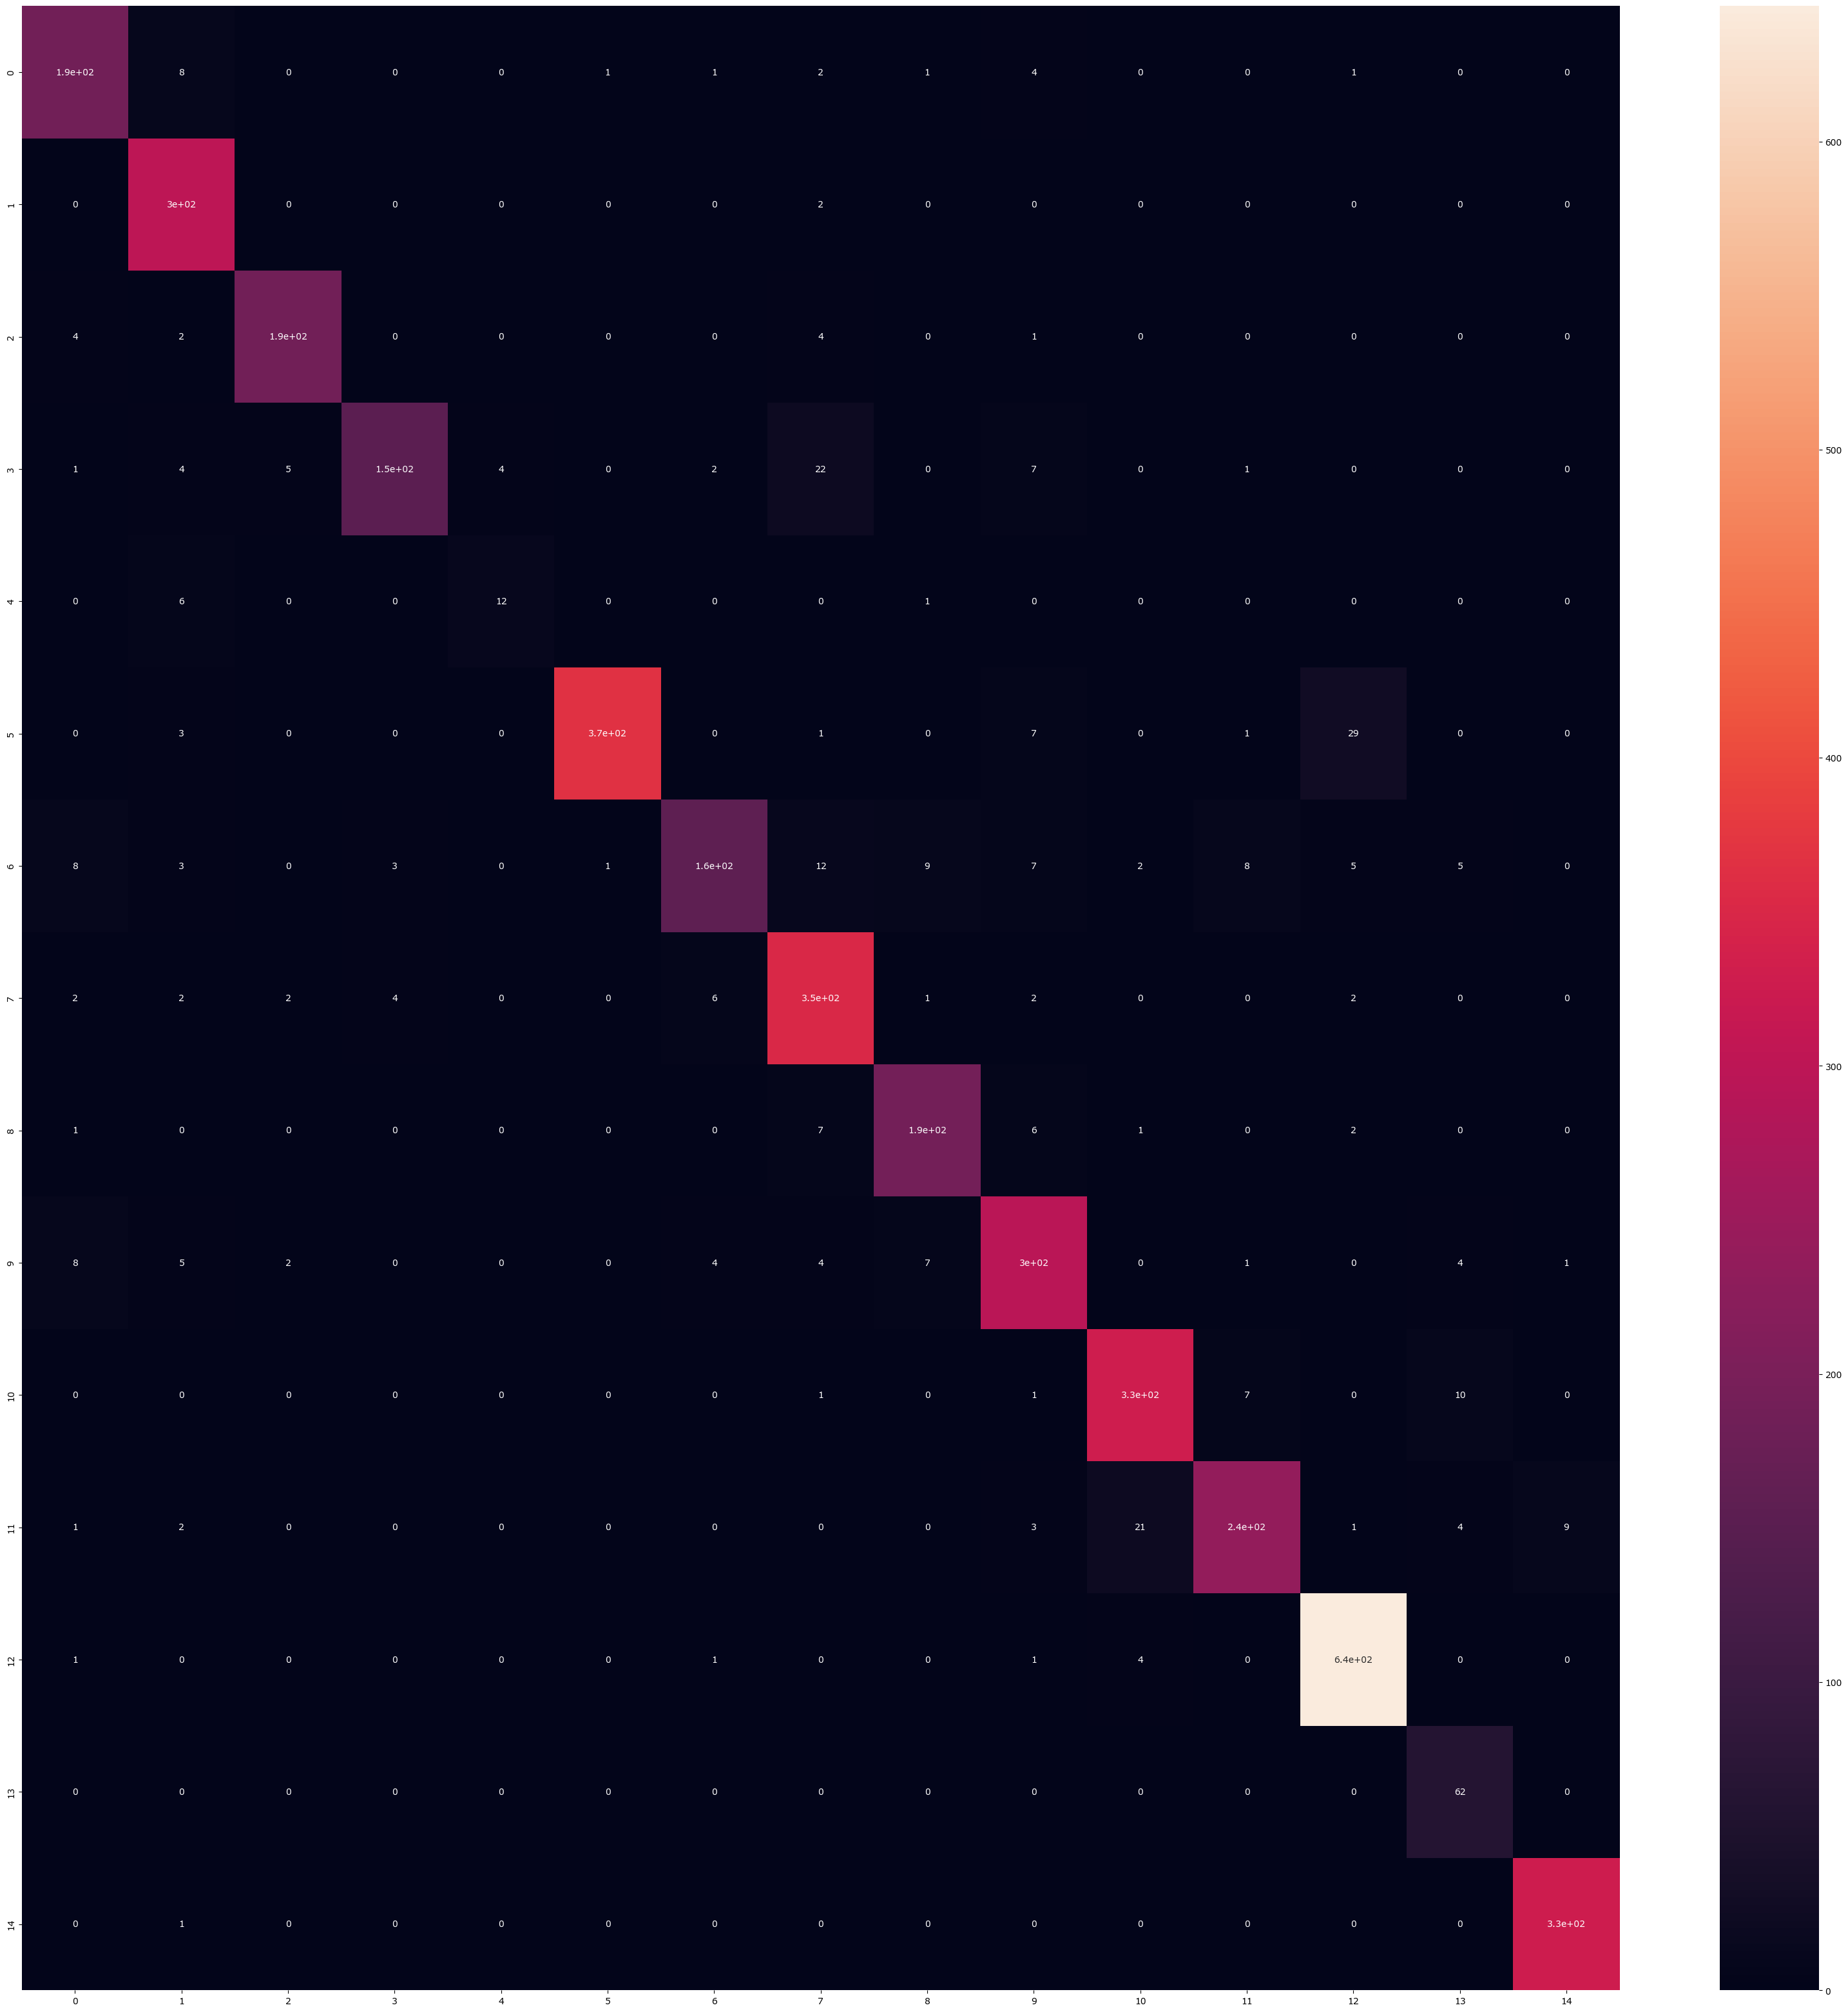

In [77]:
plt.figure(figsize=(40,40))
sns.heatmap(cn,annot=True)
plt.xlabel('predicted class,  fontsize="20')
plt.ylabel('Actual class,  fontsize="20')
plt.title('Plant disease prediction confusin matrix')
plt.show()